In [103]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# JSON 파일 로드
with open('../data/processed/labeled_keypoints_01.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [105]:
df = pd.json_normalize(data)
df.head()

,source,label,details,keypoints.right_ankle,keypoints.right_knee,keypoints.right_hip,keypoints.left_hip,keypoints.left_knee,keypoints.left_ankle,keypoints.pelvis,...,keypoints.right_eye,keypoints.left_eye,keypoints.right_ear,keypoints.left_ear,keypoints.left_big_toe,keypoints.left_small_toe,keypoints.left_heel,keypoints.right_big_toe,keypoints.right_small_toe,keypoints.right_heel
0,ai_hub,good_posture,[],"[925.0, 631.0, 2.0]","[933.0, 540.0, 2.0]","[938.0, 440.0, 2.0]","[988.0, 444.0, 2.0]","[979.0, 544.0, 2.0]","[966.0, 627.0, 2.0]","[969.0, 440.0, 2.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ai_hub,good_posture,[],"[945.0, 631.0, 2.0]","[985.0, 544.0, 2.0]","[957.0, 443.0, 2.0]","[1004.0, 447.0, 2.0]","[1010.0, 559.0, 2.0]","[972.0, 630.0, 2.0]","[983.0, 445.0, 2.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ai_hub,good_posture,[],"[985.0, 639.0, 2.0]","[1012.0, 552.0, 2.0]","[991.0, 448.0, 2.0]","[1046.0, 450.0, 2.0]","[1033.0, 555.0, 2.0]","[969.0, 619.0, 2.0]","[1022.0, 448.0, 2.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ai_hub,good_posture,[],"[995.0, 610.0, 2.0]","[1075.0, 530.0, 2.0]","[1082.0, 426.0, 2.0]","[1130.0, 425.0, 2.0]","[1130.0, 535.0, 2.0]","[1121.0, 629.0, 2.0]","[1106.0, 426.0, 2.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ai_hub,good_posture,[],"[1247.0, 632.0, 2.0]","[1242.0, 521.0, 2.0]","[1206.0, 418.0, 2.0]","[1153.0, 419.0, 2.0]","[1175.0, 526.0, 2.0]","[1130.0, 620.0, 2.0]","[1173.0, 409.0, 2.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# 자세 분포 확인
posture_counts = df['label'].value_counts()
print(posture_counts)

label
good_posture    417
bad_posture      17
Name: count, dtype: int64


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_6776\1092863413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=posture_counts.index, y=posture_counts.values, palette='viridis')


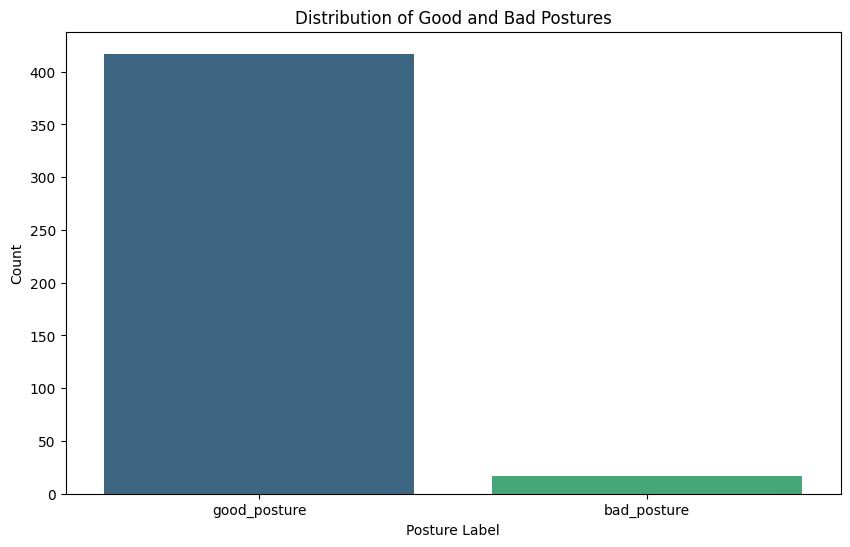

In [107]:
# 자세 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=posture_counts.index, y=posture_counts.values, palette='viridis')
plt.title('Distribution of Good and Bad Postures')
plt.xlabel('Posture Label')
plt.ylabel('Count')
plt.show()

In [108]:
# 나쁜 자세의 세부 사항 확인
bad_posture_details = df[df['label'] == 'bad_posture']['details'].explode()
bad_posture_counts = bad_posture_details.value_counts()
print(bad_posture_counts)

details
bad_right_elbow_angle    17
bad_left_elbow_angle     17
bad_right_leg_angle      15
bad_left_leg_angle        3
Name: count, dtype: int64


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_6776\3571547060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bad_posture_counts.index, y=bad_posture_counts.values, palette='viridis')


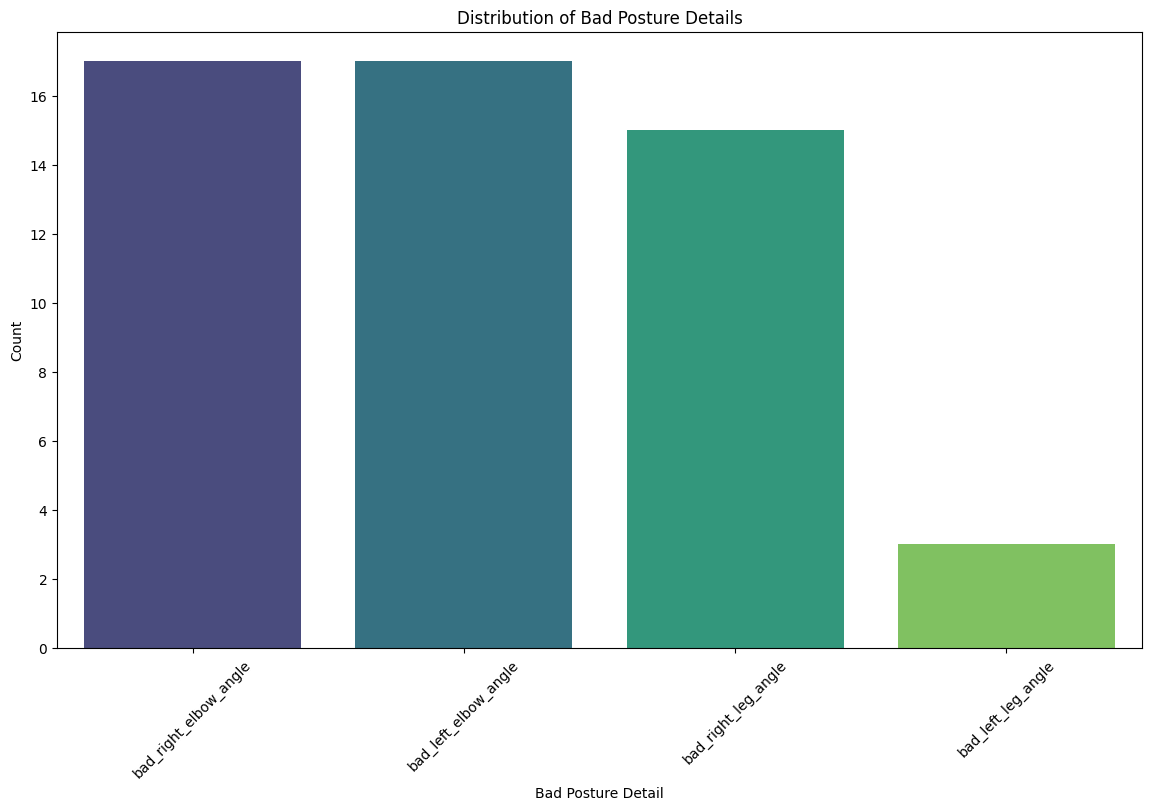

In [109]:
# 나쁜 자세 세부 사항 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x=bad_posture_counts.index, y=bad_posture_counts.values, palette='viridis')
plt.title('Distribution of Bad Posture Details')
plt.xlabel('Bad Posture Detail')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()